In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [48]:
# Load earthquake data
earthquake_data = pd.read_csv('india_eatchquake_2000.csv')

earthquake_data['time'] = pd.to_datetime(earthquake_data['time'])

# Extract relevant features from 'time' column
earthquake_data['year'] = earthquake_data['time'].dt.year
earthquake_data['month'] = earthquake_data['time'].dt.month
earthquake_data['day'] = earthquake_data['time'].dt.day
earthquake_data['hour'] = earthquake_data['time'].dt.hour
earthquake_data['minute'] = earthquake_data['time'].dt.minute
earthquake_data['second'] = earthquake_data['time'].dt.second

# Drop the original 'time' column
earthquake_data.drop(columns=['time'], inplace=True)

# Select relevant features (latitude, longitude, depth, year, month, day, hour, minute, second)
features = earthquake_data[['latitude', 'longitude','depth', 'year', 'month', 'day', 'hour', 'minute', 'second']]

# Target variable (magnitude)
target = earthquake_data['mag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [49]:
# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1)  # Output layer
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/50
221/221 [==============================] - 0s 900us/step - loss: 10433.9160 - val_loss: 17.6184
Epoch 2/50
221/221 [==============================] - 0s 700us/step - loss: 734.8984 - val_loss: 18.9534
Epoch 3/50
221/221 [==============================] - 0s 636us/step - loss: 260.9803 - val_loss: 16.3305
Epoch 4/50
221/221 [==============================] - 0s 851us/step - loss: 121.5934 - val_loss: 14.5335
Epoch 5/50
221/221 [==============================] - 0s 636us/step - loss: 73.7291 - val_loss: 11.2449
Epoch 6/50
221/221 [==============================] - 0s 625us/step - loss: 48.8616 - val_loss: 9.0871
Epoch 7/50
221/221 [==============================] - 0s 632us/step - loss: 38.7139 - val_loss: 9.5218
Epoch 8/50
221/221 [==============================] - 0s 646us/step - loss: 25.2021 - val_loss: 10.0027
Epoch 9/50
221/221 [==============================] - 0s 629us/step - loss: 20.6907 - val_loss: 9.1825
Epoch 10/50
221/221 [==============================] - 0s 724

In [50]:

# Make predictions
predictions = model.predict(X_test_scaled)

# Print some sample predictions
for i in range(5):
    print(predictions[i])
    print("Predicted magnitude:", predictions[i][0], " Actual magnitude:", y_test.iloc[i])
    # print("Predicted depth:", predictions[i], " Actual depth:", y_test.iloc[i])



62/62 [==============================] - 0s 359us/step
[4.556753]
Predicted magnitude: 4.556753  Actual magnitude: 4.6
[4.523237]
Predicted magnitude: 4.523237  Actual magnitude: 5.3
[4.506553]
Predicted magnitude: 4.506553  Actual magnitude: 4.3
[4.544625]
Predicted magnitude: 4.544625  Actual magnitude: 4.0
[4.516438]
Predicted magnitude: 4.516438  Actual magnitude: 4.1


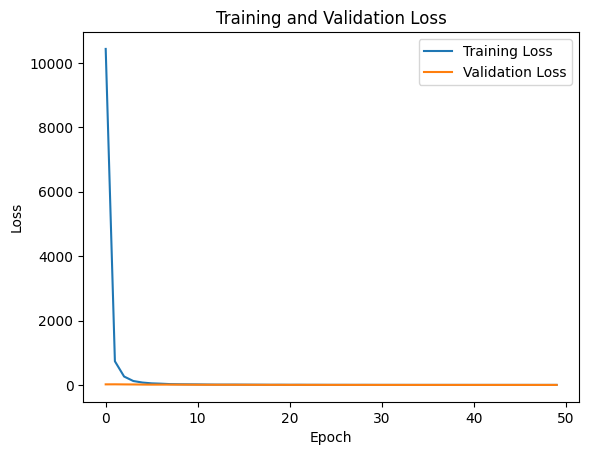

In [51]:
# Plot training loss and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define thresholds for earthquake magnitude levels
thresholds = [3.0, 4.0, 5.0, 6.0]

# Convert predictions and actual magnitudes to binary labels based on thresholds
def classify_magnitude(magnitude, thresholds):
    for i, threshold in enumerate(thresholds):
        if magnitude < threshold:
            return i
    return len(thresholds)

y_pred_class = [classify_magnitude(pred, thresholds) for pred in predictions]
y_test_class = [classify_magnitude(true, thresholds) for true in y_test]

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7571283095723014
Precision: 0.5732432771558107
Recall: 0.7571283095723014
F1-score: 0.6524774247082076


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
print(X_train_scaled)

[[ 6.61748851e-01 -4.50750924e-02 -7.65392414e-01 ... -1.23682571e+00
  -9.75216235e-01  1.41482541e+00]
 [ 1.20303349e+00 -4.98705437e-01 -6.90024739e-01 ...  7.72643804e-01
  -1.14904300e+00  1.06956453e+00]
 [-1.37809791e+00  7.00164486e-01 -7.65889764e-01 ... -8.85574149e-02
   1.28453170e+00  3.37818902e-02]
 ...
 [ 1.22322742e+00 -7.48676756e-01 -7.65392414e-01 ...  1.05971088e+00
   1.22658944e+00 -7.14283348e-01]
 [-1.41052050e+00  7.14067762e-01 -7.65392414e-01 ... -1.23682571e+00
   7.05109151e-01  4.94129729e-01]
 [-1.27075398e+00  6.70895692e-01 -2.38350945e-04 ...  1.98509658e-01
  -7.43447217e-01 -2.37615897e-02]]


Epoch 1/50
58862/77530 [=====================>........] - ETA: 9s - loss: 0.7453